# Практическая работа №5: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе полиномиальных приближений

Выполнили студенты гр. 0382 Азаров Максим и Шангичев Василий. Вариант №13.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

\\
**Спектр дискретного сигнала:**

Представим дискретный сигнал $\{x_k\}$ в виде функции от времени:
$$s(t)=\sum_{k=-\infty}^{\infty} x_k\delta(t-k)$$

\\
Применим преобразование Фурье, это и будет **спектром дискретного сигнала**:
$$S(\omega)=\sum_{k=-\infty}^{\infty} x_ke^{-i\omega k}$$


**Дискретное преобразование Фурье(ДПФ):**

Пусть последовательность отсчётов $\{x_k\}$ является периодической с периодом $N$

$$X(n)=\sum_{k=0}^{N-1}x_ke^{-i\frac{2 \pi n}{N}k}, \quad n=0,1,2,...,N-1$$

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [26]:
# импорт библиотек
import numpy as np
import math
import matplotlib.pyplot as plt

### Задание 1

In [27]:

def generate_signal(A, omega, n, phi, cos_number):
  return np.sum([A[i] * np.cos(omega[i]*n + phi[i]) for i in range(cos_number)], axis=0)

T = 1
A_range = [1, 11]
cos_number = 11
phi_range = [0, 0.5]
N = 31

phi = np.random.uniform(phi_range[0], phi_range[1], size=cos_number)
omega = np.arange(0, 1.1, 0.1) * math.pi

A = np.random.randint(A_range[0], A_range[1] + 1, cos_number)
A = A / np.sum(A)

analog_n = np.linspace(0, N, 300)
discrete_n = np.arange(0, N+1, T)

analog_signal = generate_signal(A, omega, analog_n, phi, cos_number)
discrete_signal = generate_signal(A, omega, discrete_n, phi, cos_number)





### Задание 2

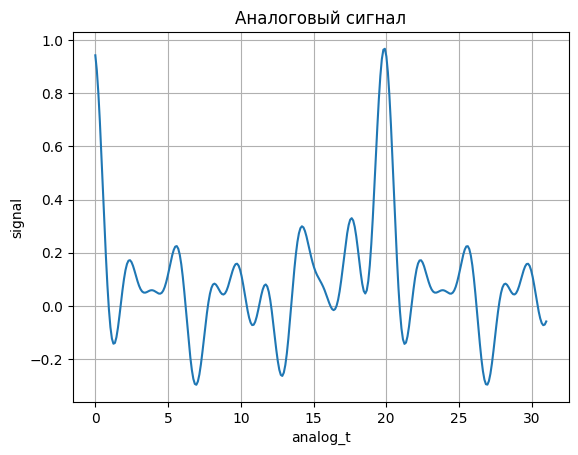

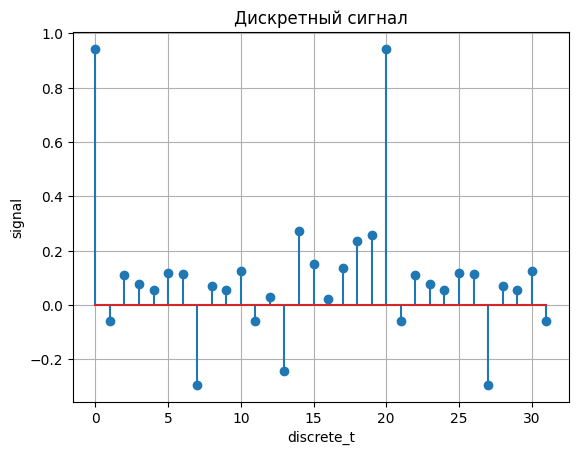

In [28]:


fig1 = plt.figure()
plt.plot(analog_n, analog_signal)
plt.title('Аналоговый сигнал')
plt.xlabel('analog_t')
plt.ylabel('signal')
plt.grid(True)
fig1.show()

fig2 = plt.figure()
plt.stem(discrete_n, discrete_signal)
plt.title('Дискретный сигнал')
plt.xlabel('discrete_t')
plt.ylabel('signal')
plt.grid(True)
fig2.show()

### Задание 3

С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.


Имея один и тот же конечный набор чисел, можно рассчитать либо спектральную функцию этого дискретного сигнала по формуле
$$S(\omega)=\sum_{k=-\infty}^{\infty} x_ke^{-i\omega k}$$
либо его ДПФ по формуле:
$$X(n)=\sum_{k=0}^{N-1}x_ke^{-i\frac{2 \pi n}{N}k}, \quad n=0,1,2,...,N-1$$

ДПФ представляет собой просто дискретные отсчеты спектральной функции дискретного сигнала, соответствующие частотам $ω_n = \frac{ω_дn}{N}$.

Таким образом:
$$X(n)=S(\frac{2\pi n}{NT})=S(\omega_д\frac{ n}{N})$$

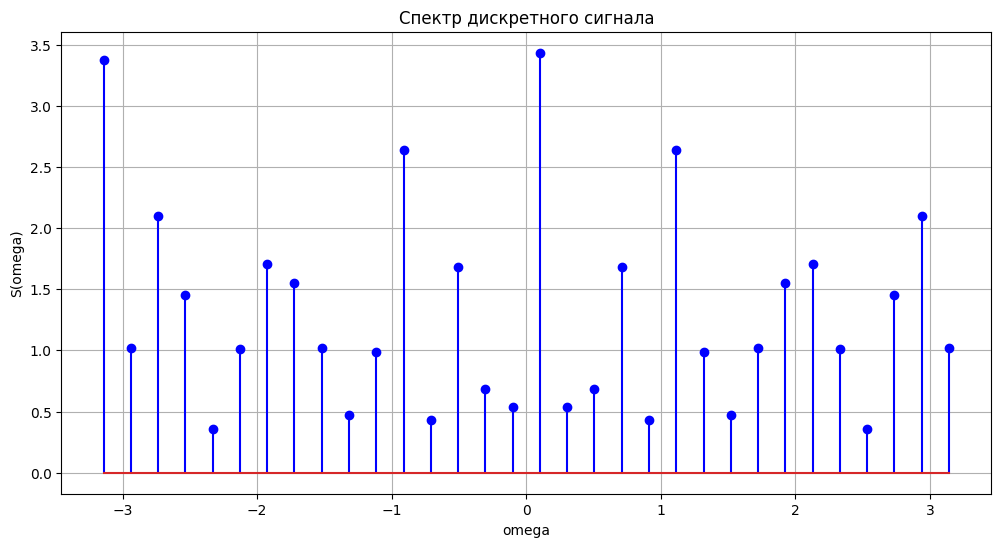

In [29]:
def DFT(x):
    # возвращает список значений для всех n
    n = np.arange(len(x))
    k = n.reshape((len(x), 1))
    e_part = np.exp(-2j * np.pi * k * n / len(x))
    return np.dot(e_part, x)

X_arr = DFT(discrete_signal)
w = np.linspace(-math.pi, math.pi, num=len(discrete_signal))

plt.figure(figsize=(12, 6))

plt.title('Спектр дискретного сигнала')
plt.stem(w, np.abs(X_arr) , 'blue')
plt.xlabel('omega')
plt.ylabel('S(omega)')
plt.grid(True)

plt.show()

### Задание 4

Линейное сглаживание по $n = 2m+1$ точкам:

$y_n = \frac1{2m+1} \sum_{k=n-m}^{n+m}s_k$

Т. к. в комплексной экспоненциальной форме полученное выражение - это геометрическая прогрессия с $r=e^{iw}$:
$$H(w) = \frac{e^{\frac{5iw}{2}} - e^{\frac{-5iw}{2}}}{5(e^{\frac{iw}{2}} - e^{\frac{-iw}{2}})} = \frac{sin(\frac{5w}{2})}{5sin(\frac{w}{2})}$$

Аналогично для сглаживания по 9 точкам:

$$H(w) = \frac{sin(\frac{9w}{2})}{9sin(\frac{w}{2})}$$


In [30]:
def convolution(arr, n):
  n = n // 2
  result = list()
  for i in range(len(arr)):
    left, right = i - n, i + n
    left, right = np.clip(0, left, len(arr)-1), np.clip(0, right, len(arr)-1)
    values = list(arr[left:(right+1)])

    values += (2 * n + 1 - len(values)) * [arr[i]]
    result.append(sum(values) / len(values))
  return np.array(result)

filtered_5, filtered_9 = convolution(discrete_signal, 5), convolution(discrete_signal, 9)

### Задание 5

График сигнала до и после фильтрации

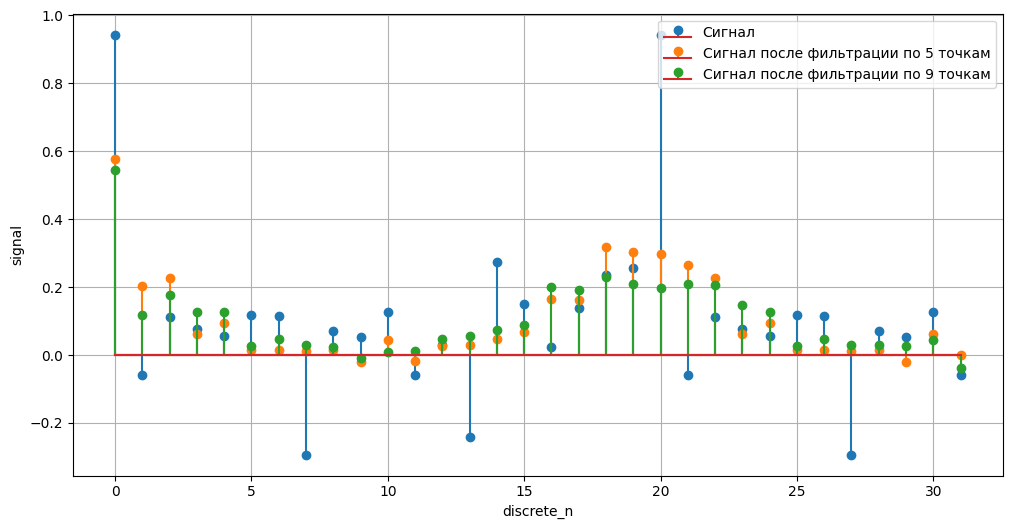

In [31]:
plt.figure(figsize=(12, 6))

plt.stem(discrete_n, discrete_signal, label='Cигнал', linefmt='C0-', markerfmt='C0o')
plt.stem(discrete_n, filtered_5, label='Cигнал после фильтрации по 5 точкам', linefmt='C1-', markerfmt='C1o')
plt.stem(discrete_n, filtered_9, label='Cигнал после фильтрации по 9 точкам', linefmt='C2-', markerfmt='C2o')

plt.xlabel('discrete_n')
plt.ylabel('signal')
plt.grid(True)

plt.legend()
plt.show()

### Задание 6

С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

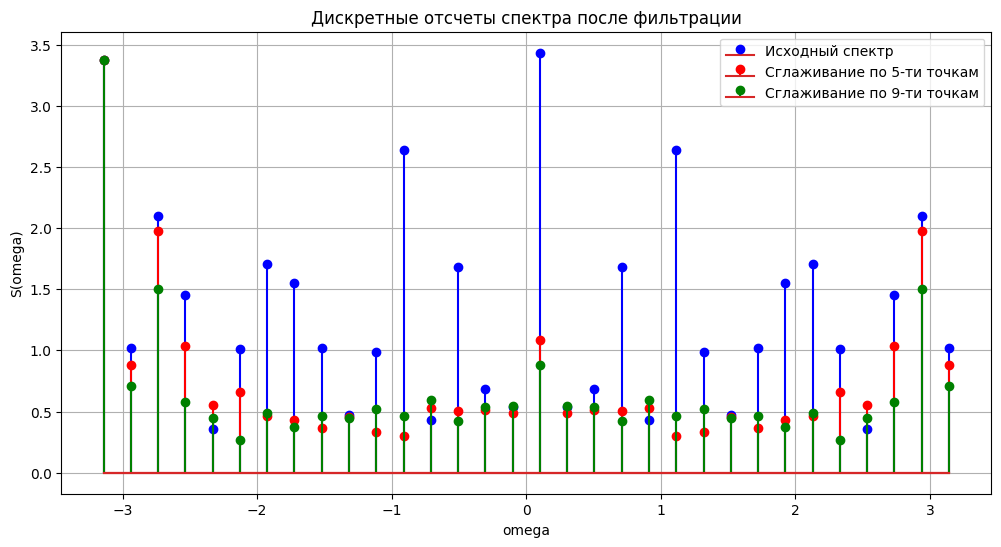

In [32]:
orig_spect = DFT(discrete_signal)
filt5_spect = DFT(filtered_5)
filt9_spect = DFT(filtered_9)

w = np.linspace(-math.pi, math.pi, num=len(discrete_signal))


plt.figure(figsize=(12, 6))
plt.title('Дискретные отсчеты спектра после фильтрации')
plt.stem(w, np.abs(orig_spect),'blue',  label='Исходный спектр')
plt.stem(w, np.abs(filt5_spect),'red',   label='Сглаживание по 5-ти точкам')
plt.stem(w, np.abs(filt9_spect), 'green', label='Сглаживание по 9-ти точкам')
plt.xlabel('omega')
plt.ylabel('S(omega)')
plt.grid(True)

plt.legend()
plt.show()

### Задание 7

Проанализировать результат на соответствие значениям $H(w)$. Сделать выводы.

Из графиков можно заметить закономерность что чем больше точек используется при сглаживании , тем меньше амплитуда у отсчетов и в $H(w)$ и в спектральных отсчетах

### Задание 8

### 4a

Сглаживание полиномом 2-й степени по 5 и 9 точкам.

* Формула:

- По 5 точкам:

$y_n = \frac{-3x_{n-2} + 12x_{n-1} + 17x_{n} + 12x_{n+1} - 3x_{n+2}}{35}$

- По 9-ти точкам:

$y_n = \frac{-21x_{n-4}+14x_{n-3}+39x_{n-2}+54x_{n-1}+59x_{k}+54x_{n+1}+39x_{n+2}+14x_{n+3}-21x_{n+4}}{231}$  

* Передаточные функции:

*   По 5-ти точкам:

$H(\omega) = \frac{17 + 24\cos\omega - 6\cos{2\omega}}{35}$

*   По 9-ти точкам:

$H(\omega)=\frac{59+108cos(\omega)+78cos(2\omega)+28cos(3\omega)-42cos(4\omega)}{231}$  

In [33]:
def weighted_convolution(arr, n, weights):
  weights = np.array(weights)
  n = n // 2
  result = list()
  for i in range(len(arr)):
    left, right = i - n, i + n
    left, right = np.clip(0, left, len(arr)-1), np.clip(0, right, len(arr)-1)
    values = list(arr[left:(right+1)])

    values += (2 * n + 1 - len(values)) * [arr[i]]
    result.append(np.array(values).dot(weights))
  return np.array(result)

poly2_filtered_5 = weighted_convolution(discrete_signal, 5, np.array([-3, 12, 17, 12, -3]) / 35)
poly2_filtered_9 = weighted_convolution(discrete_signal, 9, np.array([-21, 14, 39, 54, 59, 54, 39, 14, -21]) / 231)


### 5a

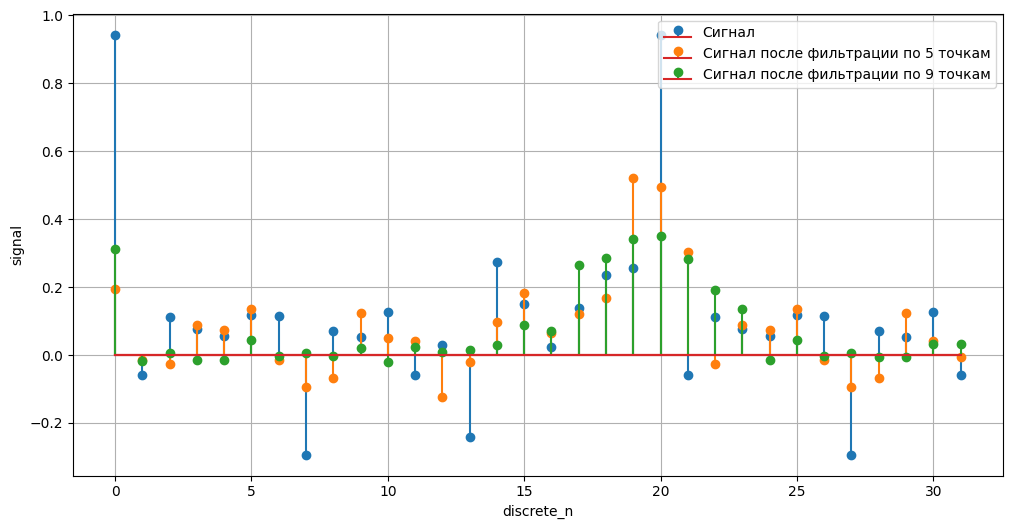

In [34]:
plt.figure(figsize=(12, 6))

plt.stem(discrete_n, discrete_signal, label='Cигнал', linefmt='C0-', markerfmt='C0o')
plt.stem(discrete_n, poly2_filtered_5, label='Cигнал после фильтрации по 5 точкам', linefmt='C1-', markerfmt='C1o')
plt.stem(discrete_n, poly2_filtered_9, label='Cигнал после фильтрации по 9 точкам', linefmt='C2-', markerfmt='C2o')

plt.xlabel('discrete_n')
plt.ylabel('signal')
plt.grid(True)

plt.legend()
plt.show()

### 6a

С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

Процедура аналогична пункту 6.

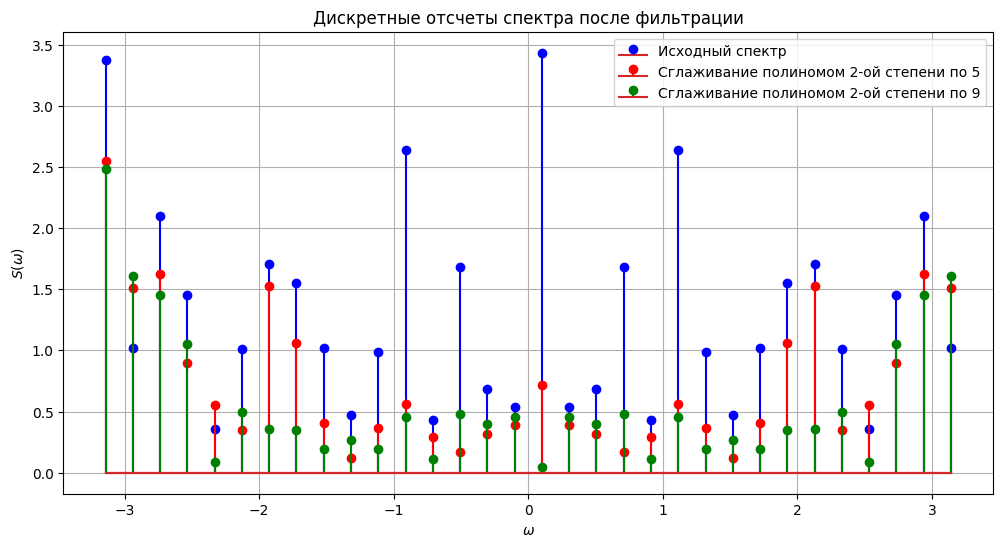

In [41]:
orig_spect = DFT(discrete_signal)
filt5_spect = DFT(poly2_filtered_5)
filt9_spect = DFT(poly2_filtered_9)

w = np.linspace(-math.pi, math.pi, num=len(discrete_signal))


plt.figure(figsize=(12, 6))
plt.title('Дискретные отсчеты спектра после фильтрации')
plt.stem(w, np.abs(orig_spect),'blue',  label='Исходный спектр')
plt.stem(w, np.abs(filt5_spect),'red',   label='Сглаживание полиномом 2-ой степени по 5')
plt.stem(w, np.abs(filt9_spect), 'green', label='Сглаживание полиномом 2-ой степени по 9')
plt.xlabel('$\omega$')
plt.ylabel('$S(\omega)$')
plt.grid(True)

plt.legend()
plt.show()

### 7a

Проанализировать результат на соответствие значениям $H(w)$. Сделать выводы.

Можно заметить, что полоса пропускания сигнала становится шире, чем в случае с линейным сглаживанием. Зато остальные апмлитуды подавляются сильнее.

### 4b

Сглаживание полиномом 4-й степени по 7 и 11 точкам.

* Формула:

- По 7 точкам:

$y_n = \frac{5x_{n-3} - 30x_{n-2} + 75x_{n-1} + 131x_k + 75x_{n+1} - 30x_{n+2} + 5x_{n+3}}{231}$

*   По 11 точкам:

$y_n=\frac{18x_{n-5}-45x_{n-4}-10x_{n-3}+60x_{n-2}+120x_{n-1}+143x_{n}+120x_{n+1}+60x_{n+2}-10x_{n+3}-45x_{n+4}+18x_{n+5}}{429}$



* Передаточные функции:

*   По 7 точкам:

$H(\omega) = \frac{131 + 150cos(\omega) - 60cos(2\omega) + 10cos(3\omega)}{231}$

*   По 11 точкам:

$H(\omega) = \frac{143 + 240cos(\omega) + 120 cos(2\omega) - 20 cos(3\omega) - 90cos(4\omega) + 36cos(5\omega)}{429}$

In [42]:
poly4_filtered_5 = weighted_convolution(discrete_signal, 7, np.array([5, -30, 75, 131, 75, -30, 5]) / 231)
poly4_filtered_9 = weighted_convolution(discrete_signal, 11, np.array([18, -45, -10, 60, 120, 143, 120, 60, -10, -45, 18]) / 429)


### 5b

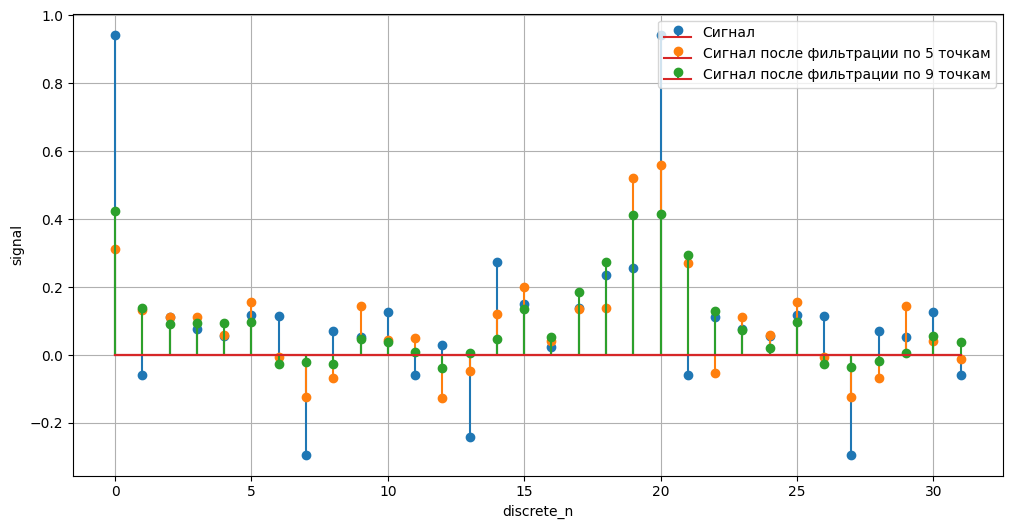

In [43]:
plt.figure(figsize=(12, 6))

plt.stem(discrete_n, discrete_signal, label='Cигнал', linefmt='C0-', markerfmt='C0o')
plt.stem(discrete_n, poly4_filtered_5, label='Cигнал после фильтрации по 5 точкам', linefmt='C1-', markerfmt='C1o')
plt.stem(discrete_n, poly4_filtered_9, label='Cигнал после фильтрации по 9 точкам', linefmt='C2-', markerfmt='C2o')

plt.xlabel('discrete_n')
plt.ylabel('signal')
plt.grid(True)

plt.legend()
plt.show()

### 6b

С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

Процедура аналогична пункту 6.

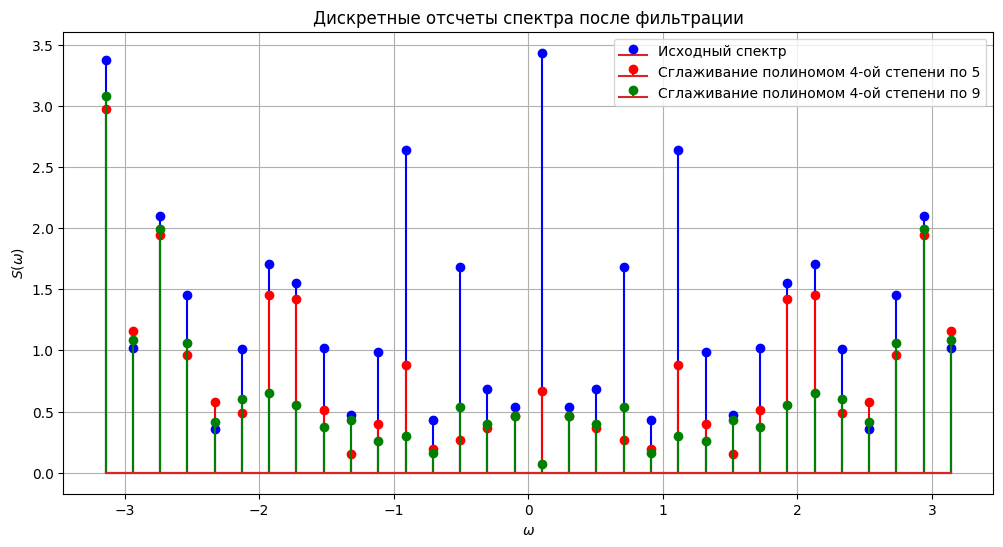

In [44]:
orig_spect = DFT(discrete_signal)
filt5_spect = DFT(poly4_filtered_5)
filt9_spect = DFT(poly4_filtered_9)

w = np.linspace(-math.pi, math.pi, num=len(discrete_signal))


plt.figure(figsize=(12, 6))
plt.title('Дискретные отсчеты спектра после фильтрации')
plt.stem(w, np.abs(orig_spect),'blue',  label='Исходный спектр')
plt.stem(w, np.abs(filt5_spect),'red',   label='Сглаживание полиномом 4-ой степени по 5')
plt.stem(w, np.abs(filt9_spect), 'green', label='Сглаживание полиномом 4-ой степени по 9')
plt.xlabel('$\omega$')
plt.ylabel('$S(\omega)$')
plt.grid(True)

plt.legend()
plt.show()

### 7b

Проанализировать результат на соответствие значениям $H(w)$. Сделать выводы.

Можно заметить, что  ширина полосы пропускания увеличилась по сравнению с графиками сглаживания полиномом 2-ой степени и линейным.

## Выводы


В результате выполнения практической работы, были получены  навыки выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров. Также был приобретен опыт в анализе получаемых результатов с помощью **дискретного преобразования Фурье (ДПФ)**. Сначала был сгенерирован дискретный сигнал , посредством дискретизации непрерывного сигнала. Для данного сигнала были найдены дискретные отсчеты спектра с помощью **дискретного преобразования Фурье**. Затем был произведен сравнительный анализ полученого спектра со спектрами сглаженых дискретных сигналов , посредством линейного и полиномиального сглаживания 2-ой и 4-ой степени. В результате чего было выясненно что фильтры сглаживания имеют схожий между собой эффект, но в зависимости от степени сглаживающего полинома и количество точек, по которым проводится сглаживание, выходной сигнал приобретает немного различные спектры.  Все дискретные функции и спектры были визуализированы в ходе работы .
